In [43]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()


In [44]:
df = pd.read_csv('fcc-forum-pageviews.csv', index_col='date', parse_dates=True)

df.head()

,value
date,
2016-05-09,1201
2016-05-10,2329
2016-05-11,1716
2016-05-12,10539
2016-05-13,6933


In [45]:
df['value'] = df[(df['value'] >= df['value'].quantile(0.025)) | (df['value'] <= df['value'].quantile(0.975)) ]
df = df.sort_values('date')


In [4]:
df['value'].mean()
df['value'].max()


1173655

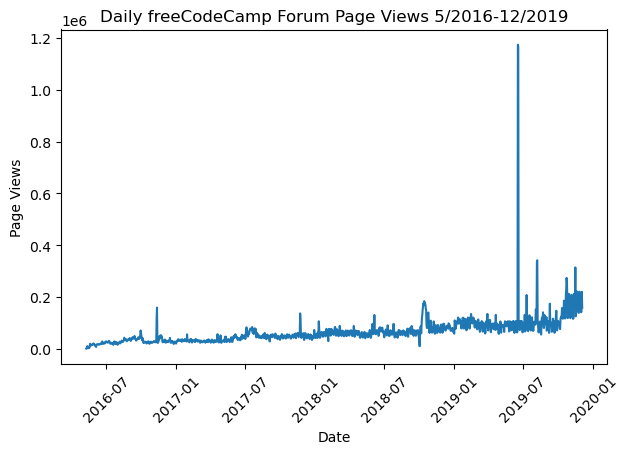

In [44]:
plt.plot(df.index,df['value'])

plt.ylabel('Page Views')
plt.xlabel('Date')
plt.title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [55]:
df_grouped = df.groupby(['year', 'month'])['value'].mean().reset_index()
df_grouped['year_month'] = df_grouped['year'].astype(str) + '-' + df_grouped['month'].astype(str).str.zfill(2)


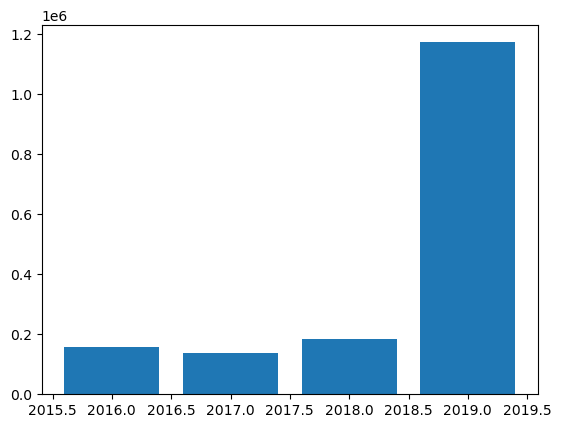

In [59]:
plt.bar(df['year'], df['value'])

df['year'] = df.index.year
df['month'] = df.index.month

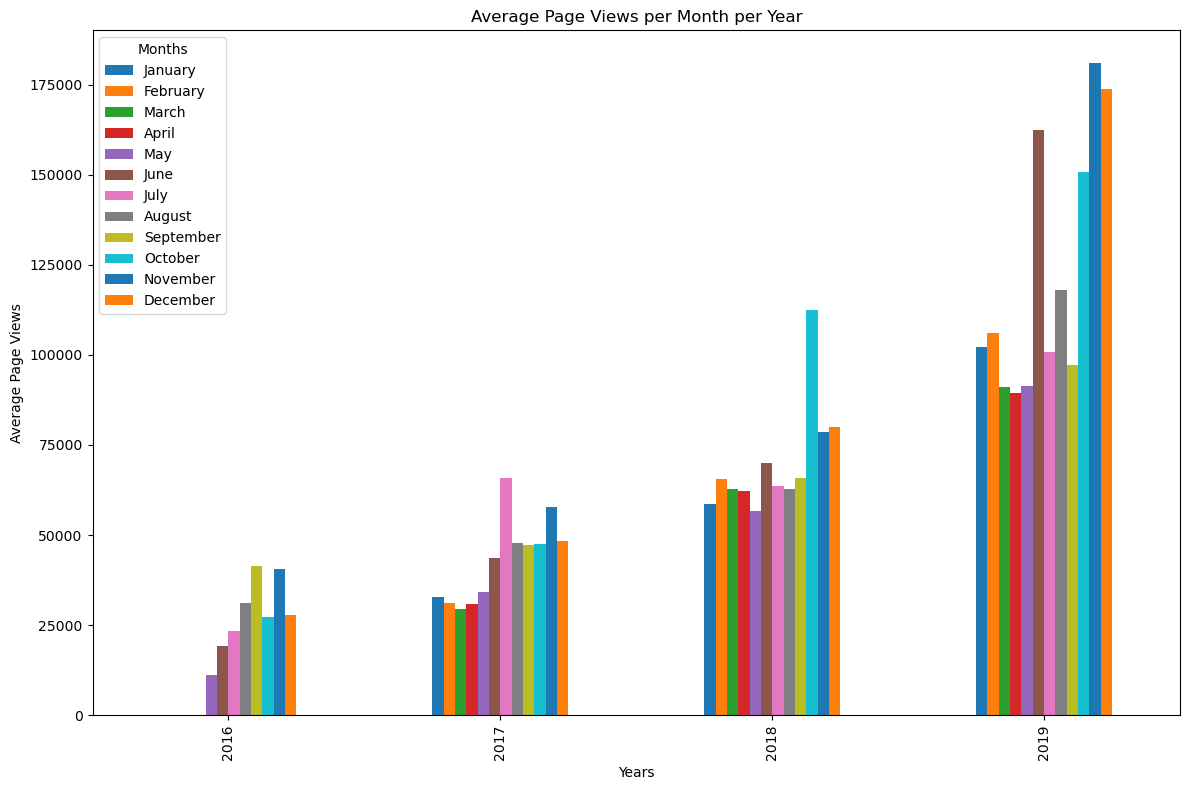

In [60]:
df['month'] = df.index.month_name()

df_grouped = df.groupby(['year', 'month'])['value'].mean().unstack()
months_order = [
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'
]
df_grouped = df_grouped[months_order]
df_grouped.plot(kind='bar', figsize=(12, 8))

plt.title('Average Page Views per Month per Year')
plt.xlabel('Years')
plt.ylabel('Average Page Views')
plt.legend(title='Months')
plt.tight_layout()
plt.show()

In [53]:
df_box = df.copy()
df_box.reset_index(inplace=True)
df_box['year'] = [d.year for d in df_box.date]
df_box['month'] = [d.strftime('%b') for d in df_box.date]
month_order = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
df_box['month'] = df_box['month'].sort_values()
df_box.head()
df_box[df_box['year'] == 2016]['value'].sum()

6687497

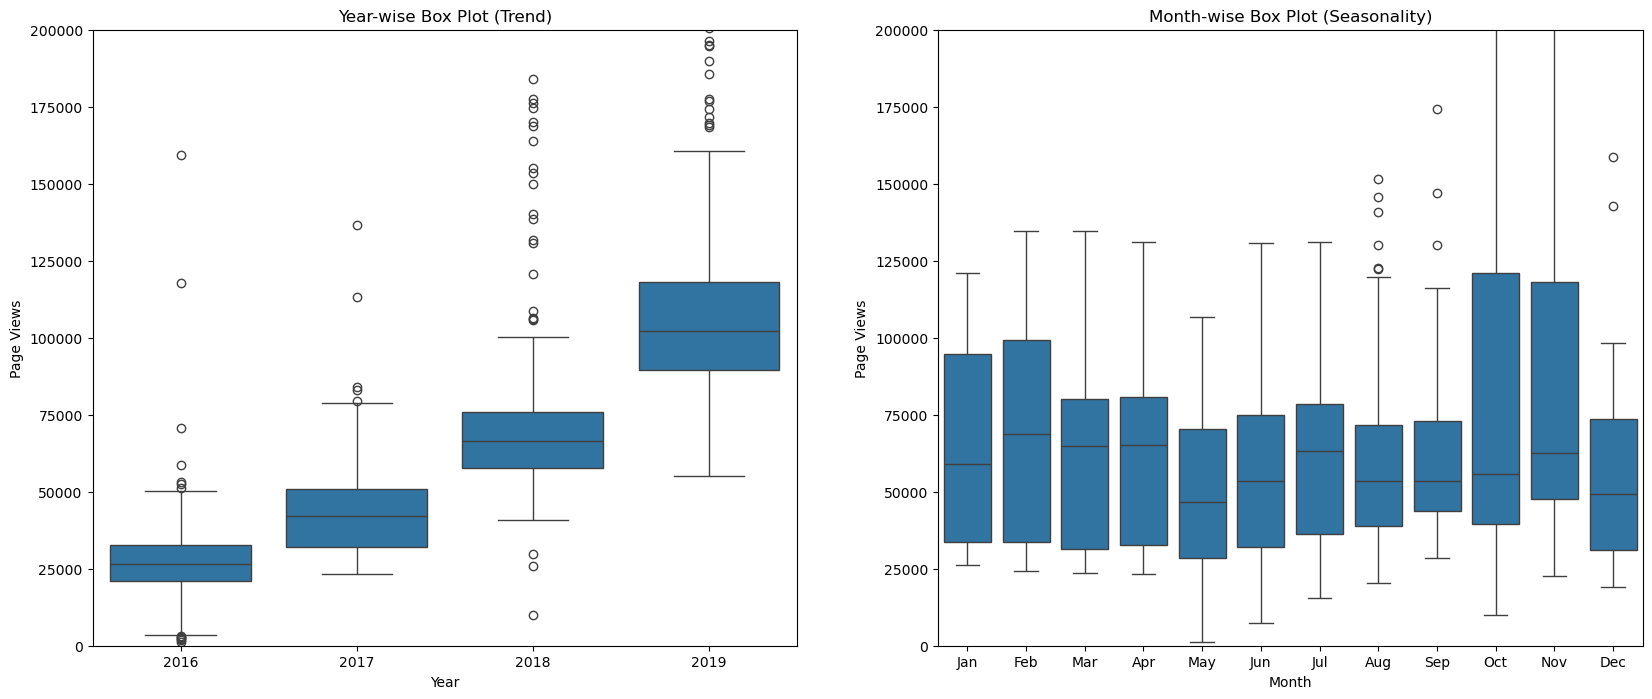

In [54]:
fig, axs = plt.subplots(1, 2, figsize=(20, 8))
sns.boxplot(data=df_box, x="year", y="value", ax=axs[0])
axs[0].ticklabel_format(style='plain', axis='y')
axs[0].set_ylim(0, 200000)
axs[0].set_title("Year-wise Box Plot (Trend)")
axs[0].set_xlabel("Year")
axs[0].set_ylabel("Page Views")

sns.boxplot(data=df_box, x="month", y="value", ax=axs[1], order=month_order)
axs[1].ticklabel_format(style='plain', axis='y')
axs[1].set_ylim(0, 200000)
axs[1].set_title("Month-wise Box Plot (Seasonality)")
axs[1].set_xlabel("Month")
axs[1].set_ylabel("Page Views")
plt.show()

In [52]:
df_box['month'].value_counts()

month
Jul    124
Aug    124
Oct    124
Jun    120
Sep    120
Nov    120
May    116
Dec     96
Jan     93
Mar     93
Apr     90
Feb     84
Name: count, dtype: int64